In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("./brain_train.csv")
df

,path,diagnose
0,./Brain scans\Tumor\TRAIN\y0.jpg,tumor
1,./Brain scans\Tumor\TRAIN\y1.jpg,tumor
2,./Brain scans\Tumor\TRAIN\y10.jpg,tumor
3,./Brain scans\Tumor\TRAIN\y100.jpg,tumor
4,./Brain scans\Tumor\TRAIN\y101.jpg,tumor
...,...,...
996,./Brain scans/No tumor\Train\no95.jpg,no tumor
997,./Brain scans/No tumor\Train\no96.jpg,no tumor
998,./Brain scans/No tumor\Train\no97.jpg,no tumor
999,./Brain scans/No tumor\Train\no98.jpg,no tumor


In [3]:
type(df["path"][0])
df["path"][0]

'./Brain scans\\Tumor\\TRAIN\\y0.jpg'

In [4]:
img = cv2.imread(df["path"][0], 0)

In [5]:
type(img)

numpy.ndarray

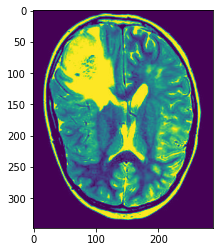

In [6]:
plt.imshow(img)

In [7]:
images = []
for path in df["path"]:
    images.append(cv2.resize(cv2.imread(path,0), (300,300)))
type(images)

list

In [8]:
images[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [427]:
orb = cv2.ORB_create(nfeatures = 850)

In [428]:
def Feature_extractor(image, extractor):
    kp, des = extractor.detectAndCompute(image, None)
    return kp, des

In [429]:
from sklearn.cluster import KMeans

In [430]:
k = 25

In [431]:
kmeans_model = KMeans(n_clusters = k)

In [432]:
features_list = []
for image in images:
    kp, des = Feature_extractor(image, orb)
    kps.append(kp)
    des_list.append((image,kp,des))

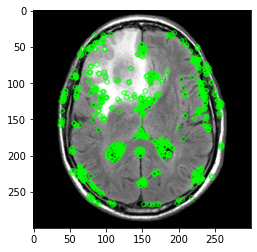

In [433]:
test_img = cv2.drawKeypoints(des_list[234][0], kps[234], None, color = (0,255,0), flags = 0)
plt.imshow(test_img)
plt.show()

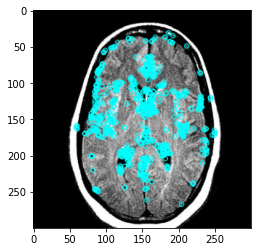

In [434]:
test_img = cv2.drawKeypoints(des_list[723][0], kps[723], None, color = (0,255,255), flags = 0)
plt.imshow(test_img)
plt.show()

In [435]:
descriptors = des_list[0][1]
for image, des in des_list[1:]:
    descriptors = np.vstack((descriptors, des))

In [436]:
descriptors.shape

(740175, 32)

In [437]:
kmeans_model.fit(descriptors)

KMeans(n_clusters=25)

In [438]:
codebook = kmeans_model.cluster_centers_

In [439]:
type(codebook)

numpy.ndarray

In [440]:
codebook.shape

(25, 32)

In [441]:
codebook[20].shape

(32,)

In [442]:
from scipy.cluster.vq import vq

In [443]:
visual_words = []

In [444]:
for image, des in des_list[:]:
    im_visual_words, distance = vq(des, codebook)
    visual_words.append(im_visual_words)

In [445]:
visual_words[0][:5]

array([ 6,  9, 21, 21, 17])

In [446]:
frequency_vectors = []
for img_visual_words in visual_words:
    img_frequency_vector = np.zeros(k)
    for word in img_visual_words:
        img_frequency_vector[word] += 1
    frequency_vectors.append(img_frequency_vector)
frequency_vectors = np.stack(frequency_vectors)

In [447]:
frequency_vectors.shape[0]

1001

In [448]:
new_df = pd.DataFrame(data = frequency_vectors)

In [449]:
type(frequency_vectors[:,0])

numpy.ndarray

In [450]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,50.0,16.0,18.0,28.0,49.0,22.0,59.0,46.0,23.0,31.0,...,28.0,26.0,44.0,46.0,17.0,32.0,66.0,34.0,20.0,35.0
1,42.0,32.0,37.0,51.0,31.0,37.0,18.0,30.0,30.0,14.0,...,53.0,47.0,16.0,22.0,13.0,23.0,35.0,27.0,34.0,43.0
2,37.0,39.0,25.0,39.0,35.0,15.0,20.0,37.0,26.0,17.0,...,57.0,51.0,36.0,12.0,14.0,43.0,27.0,21.0,35.0,58.0
3,90.0,7.0,11.0,16.0,22.0,18.0,82.0,47.0,26.0,30.0,...,28.0,15.0,21.0,97.0,30.0,33.0,71.0,23.0,9.0,18.0
4,54.0,5.0,6.0,8.0,17.0,8.0,54.0,54.0,15.0,41.0,...,14.0,10.0,18.0,84.0,35.0,17.0,29.0,33.0,6.0,14.0


In [451]:
new_df = (new_df - new_df.mean()) / new_df.std()

In [452]:
new_df['label'] = df['diagnose']

In [453]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,label
0,1.011344,-0.734099,-0.433106,-0.129702,2.221626,-0.374947,1.286216,0.655380,-0.418857,-0.039077,...,-0.364034,1.243448,0.497391,-0.792958,-0.011251,2.262156,0.328950,-0.457601,0.378193,tumor
1,0.565274,0.021368,0.457407,1.713591,0.311742,0.690905,-0.525736,-0.110290,0.161742,-1.043556,...,1.024527,-0.750565,-0.447593,-1.035232,-0.756568,0.337792,-0.164404,0.153726,0.988053,tumor
2,0.286481,0.351885,-0.105022,0.751873,0.736161,-0.872345,-0.437348,0.224691,-0.170028,-0.866295,...,1.289015,0.673730,-0.841336,-0.974663,0.899691,-0.158819,-0.587279,0.197392,2.131542,tumor
3,3.241694,-1.159049,-0.761190,-1.091420,-0.643200,-0.659174,2.302677,0.703234,-0.170028,-0.098164,...,-1.091376,-0.394491,2.505482,-0.005567,0.071562,2.572537,-0.446321,-0.937929,-0.917761,tumor
4,1.234379,-1.253483,-0.995536,-1.732566,-1.173723,-1.369742,1.065246,1.038214,-1.082398,0.551794,...,-1.421986,-0.608136,1.993616,0.297276,-1.253445,-0.034666,0.258470,-1.068928,-1.222691,tumor


In [454]:
from sklearn import tree
from sklearn.utils import shuffle
new_df = shuffle(new_df)

In [455]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,label
147,0.286481,1.862819,-0.479976,1.473161,-0.749305,-0.872345,-0.835093,-1.067376,-0.170028,-0.689034,...,1.751869,-1.177854,-1.038208,-0.914095,-0.922193,-0.531276,-1.221592,1.420046,0.073262,tumor
17,-0.271107,0.021368,-0.339368,0.591586,0.842265,0.406678,-0.083796,-0.062435,-0.087086,-1.102643,...,1.024527,-0.180847,-0.093224,-1.216937,-0.094064,1.020631,-0.587279,-0.632266,0.073262,tumor
454,1.234379,-0.120282,0.363669,-0.209845,-1.385932,-0.801288,0.004592,-0.205998,0.576456,-0.689034,...,-0.297912,-0.750565,0.694263,-1.035232,-0.922193,-0.965810,-1.010154,-0.719598,-1.070226,tumor
699,-0.159589,0.635185,-0.901798,1.152589,0.736161,-0.446004,-0.216378,-0.636687,1.820597,-0.157251,...,0.693917,2.810173,-0.329470,0.055002,0.651252,0.896478,1.174699,0.022727,0.988053,no tumor
485,-1.274764,0.918485,-0.667452,0.992302,1.054475,-1.156572,-0.879287,-0.875959,-0.584742,-1.043556,...,0.032698,-1.462713,-0.880711,-1.216937,-2.412826,-1.027886,-1.644466,0.415723,-1.375156,tumor


In [456]:
clf = tree.DecisionTreeClassifier()

In [457]:
X_Train = new_df.loc[:, new_df.columns != 'label']
Y_Train = new_df['label']

In [458]:
Y_Train

147       tumor
17        tumor
454       tumor
699    no tumor
485       tumor
         ...   
413       tumor
935    no tumor
858    no tumor
59        tumor
857    no tumor
Name: label, Length: 1001, dtype: object

In [459]:
clf.fit(X_Train, Y_Train)

DecisionTreeClassifier()

In [460]:
from sklearn.metrics import classification_report

In [461]:
clf.score(X_Train,Y_Train)

1.0

In [462]:
test_df = pd.read_csv("./brain_test.csv")

In [463]:
test_df.head()

,path,diagnose
0,./Brain scans\Tumor\TEST\y701.jpg,tumor
1,./Brain scans\Tumor\TEST\y702.jpg,tumor
2,./Brain scans\Tumor\TEST\y703.jpg,tumor
3,./Brain scans\Tumor\TEST\y704.jpg,tumor
4,./Brain scans\Tumor\TEST\y705.jpg,tumor


In [464]:
test_images = []
for path in test_df["path"]:
    test_images.append(cv2.resize(cv2.imread(path,0), (300,300)))
type(test_images)

list

In [465]:
test_des_list = []
for image in test_images:
    kp, des = Feature_extractor(image, orb)
    test_des_list.append((image,des))

In [466]:
test_visual_words = []

In [467]:
for image, des in test_des_list[:]:
    im_visual_words, distance = vq(des, codebook)
    test_visual_words.append(im_visual_words)
test_frequency_vectors = []
for img_visual_words in test_visual_words:
    img_frequency_vector = np.zeros(k)
    for word in img_visual_words:
        img_frequency_vector[word] += 1
    test_frequency_vectors.append(img_frequency_vector)
test_frequency_vectors = np.stack(test_frequency_vectors)

In [468]:
test_frequency_vectors.shape[0]

200

In [469]:
new_test_df = pd.DataFrame(data = test_frequency_vectors)

In [470]:
new_test_df = (new_test_df - new_test_df.mean()) / new_test_df.std()

In [471]:
new_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.055863,-0.376227,-0.244151,-0.830558,-1.573078,-0.735381,-0.668085,-0.719704,-0.312043,-0.433936,...,-0.503300,-1.358109,-0.729874,-0.465956,-0.051680,-2.063726,-0.868423,-1.392917,-0.530111,-0.082647
1,0.009885,-0.892248,0.732454,-0.386409,-1.066776,0.872889,0.096314,0.586056,-0.214070,0.395038,...,0.204466,-0.415481,-0.895285,-0.201584,1.720190,-1.513277,-0.043449,0.809604,-0.799317,-0.333093
2,-0.725761,2.110060,-0.189896,1.123696,-1.775598,0.149167,-0.744525,-0.950132,0.373765,-1.135375,...,-0.267378,2.484912,-0.895285,-0.928608,-1.159098,-0.595861,-1.143415,-1.179770,2.565757,-0.249611
3,0.423686,0.421261,0.678198,-0.564069,0.350867,0.149167,-0.362325,-0.450871,-0.801905,-0.433936,...,1.148153,1.469774,0.593410,-0.432910,-0.199335,-0.595861,-0.043449,-0.327181,0.905654,2.171369
4,-0.174026,-0.516960,0.244151,0.501888,0.654647,0.229581,-0.056566,-0.105229,0.177820,-1.262909,...,0.519028,0.382127,0.510705,-0.069398,-1.306754,-0.137154,0.066548,-0.327181,0.681315,0.585209


In [472]:
new_test_df['label'] = test_df['diagnose']

In [473]:
new_test_df = shuffle(new_test_df)

In [474]:
X_Test = new_test_df.loc[:, new_test_df.columns != 'label']
Y_Test = new_test_df['label']

In [475]:
y_pred = clf.predict(X_Test)

In [476]:
classification_report(Y_Test, y_pred)

'              precision    recall  f1-score   support\n\n    no tumor       0.70      0.79      0.74       100\n       tumor       0.76      0.66      0.71       100\n\n    accuracy                           0.73       200\n   macro avg       0.73      0.73      0.72       200\nweighted avg       0.73      0.72      0.72       200\n'

In [477]:
misclass = 0
for i in range(y_pred.size):
    if y_pred[i] != Y_Test[i]:
        misclass+=1
error = misclass / 200
error

0.525

In [478]:
from sklearn.ensemble import AdaBoostClassifier

In [479]:
ada = AdaBoostClassifier()

In [480]:
ada.fit(X_Train, Y_Train)

AdaBoostClassifier()

In [481]:
ada_y_pred = ada.predict(X_Test)

In [482]:
misclass = 0
for i in range(ada_y_pred.size):
    if ada_y_pred[i] != Y_Test[i]:
        misclass+=1
error = misclass / 200
error

0.465